In [1]:
import boto3
import os
import json
import docx
from IPython.display import Markdown, display
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

region = os.environ.get("AWS_REGION")
boto3_bedrock = boto3.client(service_name='bedrock-runtime')
from core_lib.math_question_generation import Analyticsfunction, mathquestion
from core_lib.audio import AudioToText
from core_lib.base_function import pdfuplaodllmmodelselection


In [2]:
# initiate the objects 

obj = Analyticsfunction()
    
claude3 = obj.call_claude_sonet_text

math = mathquestion()

extract_python_code =  math.extract_python_code

detect_shape = math.detect_shape

create_image = math.create_image

getText = math.getText

question_answer_generation = math.question_answer_generation

create_summary = math.create_summary

In [3]:
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE "

In [4]:
prompt =f'''Human: write python code to draw hexagon using matplotlib
1. save as jpg
2. context into the image at top. 
3. draw correct shape
4. complete all edges
<context>
{context}
</context>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

hexagon
Figure(500x500)
hexagon


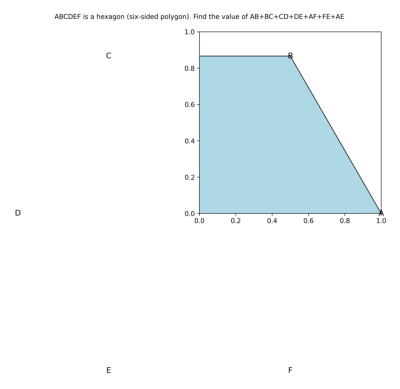

In [5]:
create_image(context)

In [6]:
# obj = AudioToText()
# obj.convert("audiofilessample")

In [7]:
#read text file from local
def read_file(filename):
    with open(filename, 'r') as f:
        return f.read()

In [8]:
text  = read_file("/Users/tiwarysa/Documents/mathimage/customer_document/video_text.txt")

In [9]:
modelid = "anthropic.claude-v2"
question = "create a summary of the entire document"

maxt = 500
t = 0.9

In [10]:
note = getText("1.notes.docx")

In [11]:
def translate(text):
    translate = boto3.client(service_name='translate', region_name='us-east-1')
    result = translate.translate_text(Text=text, SourceLanguageCode='hi', TargetLanguageCode='en')
    return result.get('TranslatedText')

In [12]:
summary = create_summary(text)

Here is a summary of the document in around 500 words:

The document is a transcript of a math lecture on 3D coordinate geometry. The instructor starts by explaining the basics of representing points in 3D using x, y and z coordinates. He then moves on to discussing the equations of planes and lines in 3D space, expressing them in cartesian and vector forms. 

The key concepts covered are:

1. Distance formula between two points in 3D space
2. Conditions for three points to be collinear in 3D
3. Mid-point formula for the mid-point of the line segment joining two points
4. Centroid/center of mass of a triangle and tetrahedron
5. Section formula for internal and external division of a line segment
6. Ratio of division for a line divided by a plane/coordinate plane
7. Ratio of division for a plane

The instructor uses examples and practice questions frequently to reinforce the concepts. He derives the 3D formulas from their 2D counterparts, highlighting the similarities. Concepts like diagonals of parallelograms bisecting each other are also discussed.

The lecture has an interactive style with the instructor asking students questions and clarifying doubts. He stresses understanding the logic behind the formulas rather than rote memorization. Towards the end, he solves some problems step-by-step on finding the coordinates of the fourth vertex of a parallelogram given three consecutive vertices.

Overall, the document serves as a comprehensive teaching resource covering analytical geometry concepts in three dimensions using a mix of theory, derivations, examples and practice problems. The instructor's interactive and lucid teaching style makes it easier for students to grasp the concepts.

In [13]:
# note and text in one string
def note_and_text(note, text):
    return f"{note}\n{text}"

combined_document = note_and_text(note, summary)

In [14]:
prompt = f'''Human: Please generate 5 multiple-choice questions and their respective answers based on the content provided in the attached document. The questions should cover a range of difficulty levels (easy, medium, and hard) and test different aspects of the content, such as factual information, concepts, and analysis. Each question should have 4 answer choices, with only one correct answer.
        additionally, please provide a brief explanation for each correct answer, helping to clarify the reasoning behind it.
        create the answer in json format.

        <book>
        {combined_document}
        </book>

        Assistant:'''

body = json.dumps({"prompt": prompt})

In [15]:
question = question_answer_generation(body)

Here are 5 multiple-choice questions and their respective answers based on the provided content, along with brief explanations for the correct answers.

{
    "questions": [
        {
            "question": "What does the equation x = 0 represent in 3D coordinate geometry?",
            "answer_choices": [
                "A. The x-axis",
                "B. The y-axis",
                "C. The z-axis",
                "D. The yz-plane"
            ],
            "correct_answer": "D",
            "explanation": "The equation x = 0 represents the yz-plane, which is the plane formed by the y-axis and the z-axis."
        },
        {
            "question": "If three points A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3) are collinear, what condition must be satisfied?",
            "answer_choices": [
                "A. (x2 - x1) / (y2 - y1) = (x3 - x1) / (y3 - y1)",
                "B. (x2 - x1) / (z2 - z1) = (x3 - x1) / (z3 - z1)",
                "C. (y2 - y1) / (z2 - z1) = (y3 - y1) / (z3 - z1)",
                "D. All of the above"
            ],
            "correct_answer": "D",
            "explanation": "For three points to be collinear in 3D space, the ratios of their coordinate differences must be equal along all three axes."
        },
        {
            "question": "What is the formula for the centroid (center of mass) of a triangle with vertices A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3)?",
            "answer_choices": [
                "A. ((x1 + x2 + x3)/3, (y1 + y2 + y3)/3, (z1 + z2 + z3)/3)",
                "B. ((x1 + x2 + x3)/2, (y1 + y2 + y3)/2, (z1 + z2 + z3)/2)",
                "C. ((x1 + x2 + x3)/4, (y1 + y2 + y3)/4, (z1 + z2 + z3)/4)",
                "D. None of the above"
            ],
            "correct_answer": "A",
            "explanation": "The centroid of a triangle in 3D space is the point obtained by taking the arithmetic mean of the x, y, and z coordinates of the three vertices."
        },
        {
            "question": "If a line segment AB is divided internally by a plane ax + by + cz + d = 0 in the ratio k:1, what is the ratio of division?",
            "answer_choices": [
                "A. k:(a(x2 - x1) + b(y2 - y1) + c(z2 - z1))",
                "B. (a(x2 - x1) + b(y2 - y1) + c(z2 - z1)):k",
                "C. (ax1 + by1 + cz1 + d):(ax2 + by2 + cz2 + d)",
                "D. (ax2 + by2 + cz2 + d):(ax1 + by1 + cz1 + d)"
            ],
            "correct_answer": "D",
            "explanation": "When a line segment AB is divided internally by a plane ax + by + cz + d = 0 in the ratio k:1, the ratio of division is given by (ax2 + by2 + cz2 + d):(ax1 + by1 + cz1 + d)."
        },
        {
            "question": "If the mid-point of the line segment joining two points A(x1, y1, z1) and B(x2, y2, z2) is M(x, y, z), what is the value of (x, y, z)?",
            "answer_choices": [
                "A. ((x1 + x2)/2, (y1 + y2)/2, (z1 + z2)/2)",
                "B. ((2x1 + x2)/3, (2y1 + y2)/3, (2z1 + z2)/3)",
                "C. ((x1 + 2x2)/3, (y1 + 2y2)/3, (z1 + 2z2)/3)",
                "D. None of the above"
            ],
            "correct_answer": "A",
            "explanation": "The mid-point of a line segment joining two points A(x1, y1, z1) and B(x2, y2, z2) is given by the point ((x1 + x2)/2, (y1 + y2)/2, (z1 + z2)/2)."
        }
    ]
}

In [16]:
json = { "questions": [ { "question": "What does the equation x = 0 represent in 3D coordinate geometry?", "options": [ "A. The x-axis", "B. The y-axis", "C. The z-axis", "D. The yz-plane" ], "answer": "D", "explanation": "The equation x = 0 represents the yz-plane, which is the plane formed by the y-axis and z-axis." }, { "question": "If the coordinates of two points A and B are (2, 3, 4) and (6, 7, 8), respectively, what is the distance between them?", "options": [ "A. 4", "B. 6", "C. √14", "D. √50" ], "answer": "D", "explanation": "The distance between two points A(x1, y1, z1) and B(x2, y2, z2) in 3D space is given by the formula: √((x2 - x1)^2 + (y2 - y1)^2 + (z2 - z1)^2). Substituting the given coordinates, we get √((6 - 2)^2 + (7 - 3)^2 + (8 - 4)^2) = √(4^2 + 4^2 + 4^2) = √50." }, { "question": "If the coordinates of three points A, B, and C are (1, 2, 3), (4, 5, 6), and (7, 8, 9), respectively, what is the condition for them to be collinear?", "options": [ "A. (x2 - x1) / (x3 - x1) = (y2 - y1) / (y3 - y1) = (z2 - z1) / (z3 - z1)", "B. (x2 - x1) / (y2 - y1) = (x3 - x1) / (y3 - y1) = (z2 - z1) / (z3 - z1)", "C. (x2 - x1) / (y2 - y1) = (y3 - y1) / (z3 - z1) = (x3 - x1) / (z3 - z1)", "D. (x2 - x1) / (z2 - z1) = (y2 - y1) / (z2 - z1) = (x3 - x1) / (y3 - y1)" ], "answer": "A", "explanation": "Three points A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3) are collinear if the ratios of the differences in their x, y, and z coordinates are equal. The condition for collinearity is (x2 - x1) / (x3 - x1) = (y2 - y1) / (y3 - y1) = (z2 - z1) / (z3 - z1)." }, { "question": "If the coordinates of the vertices of a triangle are A(1, 2, 3), B(4, 5, 6), and C(7, 8, 9), what are the coordinates of its centroid?", "options": [ "A. (4, 5, 6)", "B. (6, 7, 8)", "C. (2, 3, 4)", "D. (5, 6, 7)" ], "answer": "B", "explanation": "The centroid of a triangle with vertices A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3) is given by the formula: ((x1 + x2 + x3)/3, (y1 + y2 + y3)/3, (z1 + z2 + z3)/3). Substituting the given coordinates, we get ((1 + 4 + 7)/3, (2 + 5 + 8)/3, (3 + 6 + 9)/3) = (12/3, 15/3, 18/3) = (4, 5, 6)." }, { "question": "If a line segment AB with endpoints A(2, 3, 4) and B(6, 7, 8) is divided internally by the plane 2x - y + 3z - 5 = 0 in the ratio 2:3, what are the coordinates of the point of division?", "options": [ "A. (3, 4, 5)", "B. (4, 5, 6)", "C. (5, 6, 7)", "D. (6, 7, 8)" ], "answer": "B", "explanation": "The formula for internal division of a line segment AB with endpoints A(x1, y1, z1) and B(x2, y2, z2) by a plane ax + by + cz + d = 0 in the ratio k:1 is: ((kx2 + x1)/(k + 1), (ky2 + y1)/(k + 1), (kz2 + z1)/(k + 1)). Given the ratio 2:3, k = 2. Substituting the coordinates and the plane equation, we get ((2 * 6 + 2)/4, (2 * 7 + 3)/4, (2 * 8 + 4)/4) = (4, 5, 6)." } ] }


In [17]:
import json

def extract_json(response):
    try:
        # Find the start and end indices of the JSON data
        start_index = response.find('{')
        end_index = response.rfind('}') + 1
        
        # Extract the JSON data substring
        json_data = response[start_index:end_index]
        
        # Parse the JSON data
        data = json.loads(json_data)
        
        return data
    except (ValueError, TypeError):
        print("Error: Invalid JSON data")
        return None

In [18]:
json_data = extract_json(question)
if json_data:
    print(json_data)

{'questions': [{'question': 'What does the equation x = 0 represent in 3D coordinate geometry?', 'answer_choices': ['A. The x-axis', 'B. The y-axis', 'C. The z-axis', 'D. The yz-plane'], 'correct_answer': 'D', 'explanation': 'The equation x = 0 represents the yz-plane, which is the plane formed by the y-axis and the z-axis.'}, {'question': 'If three points A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3) are collinear, what condition must be satisfied?', 'answer_choices': ['A. (x2 - x1) / (y2 - y1) = (x3 - x1) / (y3 - y1)', 'B. (x2 - x1) / (z2 - z1) = (x3 - x1) / (z3 - z1)', 'C. (y2 - y1) / (z2 - z1) = (y3 - y1) / (z3 - z1)', 'D. All of the above'], 'correct_answer': 'D', 'explanation': 'For three points to be collinear in 3D space, the ratios of their coordinate differences must be equal along all three axes.'}, {'question': 'What is the formula for the centroid (center of mass) of a triangle with vertices A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3)?', 'answer_choices': ['A. ((x1 +

In [20]:
json_data["questions"][0]

{'question': 'What does the equation x = 0 represent in 3D coordinate geometry?',
 'answer_choices': ['A. The x-axis',
  'B. The y-axis',
  'C. The z-axis',
  'D. The yz-plane'],
 'correct_answer': 'D',
 'explanation': 'The equation x = 0 represents the yz-plane, which is the plane formed by the y-axis and the z-axis.'}

Question: What does the equation x = 0 represent in 3D coordinate geometry?
plane
Figure(600x400)
plane


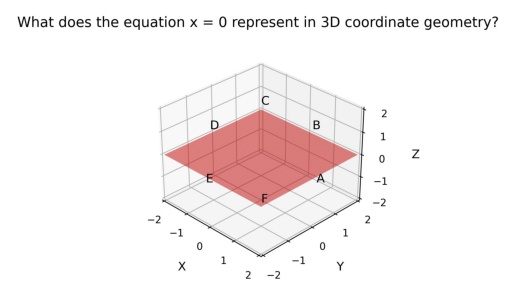

Options: ['A. The x-axis', 'B. The y-axis', 'C. The z-axis', 'D. The yz-plane']
Answer: D
Explanation: The equation x = 0 represents the yz-plane, which is the plane formed by the y-axis and the z-axis.

Question: If three points A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3) are collinear, what condition must be satisfied?
line
line


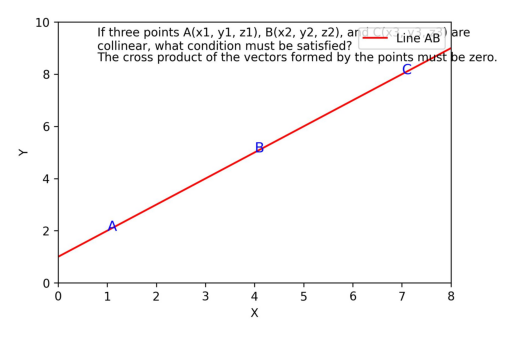

Options: ['A. (x2 - x1) / (y2 - y1) = (x3 - x1) / (y3 - y1)', 'B. (x2 - x1) / (z2 - z1) = (x3 - x1) / (z3 - z1)', 'C. (y2 - y1) / (z2 - z1) = (y3 - y1) / (z3 - z1)', 'D. All of the above']
Answer: D
Explanation: For three points to be collinear in 3D space, the ratios of their coordinate differences must be equal along all three axes.

Question: What is the formula for the centroid (center of mass) of a triangle with vertices A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3)?
triangle
Figure(500x500)
triangle


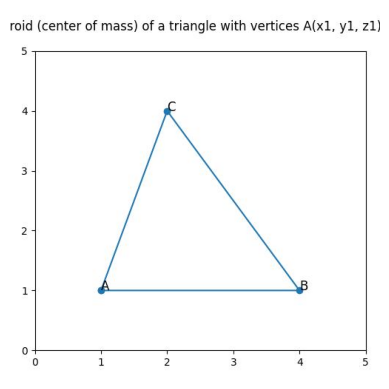

Options: ['A. ((x1 + x2 + x3)/3, (y1 + y2 + y3)/3, (z1 + z2 + z3)/3)', 'B. ((x1 + x2 + x3)/2, (y1 + y2 + y3)/2, (z1 + z2 + z3)/2)', 'C. ((x1 + x2 + x3)/4, (y1 + y2 + y3)/4, (z1 + z2 + z3)/4)', 'D. None of the above']
Answer: A
Explanation: The centroid of a triangle in 3D space is the point obtained by taking the arithmetic mean of the x, y, and z coordinates of the three vertices.

Question: If a line segment AB is divided internally by a plane ax + by + cz + d = 0 in the ratio k:1, what is the ratio of division?
line
line


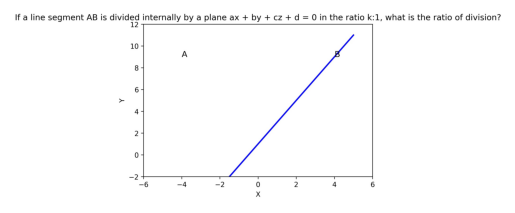

Options: ['A. k:(a(x2 - x1) + b(y2 - y1) + c(z2 - z1))', 'B. (a(x2 - x1) + b(y2 - y1) + c(z2 - z1)):k', 'C. (ax1 + by1 + cz1 + d):(ax2 + by2 + cz2 + d)', 'D. (ax2 + by2 + cz2 + d):(ax1 + by1 + cz1 + d)']
Answer: D
Explanation: When a line segment AB is divided internally by a plane ax + by + cz + d = 0 in the ratio k:1, the ratio of division is given by (ax2 + by2 + cz2 + d):(ax1 + by1 + cz1 + d).

Question: If the mid-point of the line segment joining two points A(x1, y1, z1) and B(x2, y2, z2) is M(x, y, z), what is the value of (x, y, z)?
line


Traceback (most recent call last):
  File "/Users/tiwarysa/Documents/mathimage/main.py", line 15, in <module>
    ax.text(x1 - 0.2, y1 - 0.2, z1 - 0.2, 'A', fontsize=12)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/axes/_axes.py", line 695, in text
    effective_kwargs = {
                       ^
TypeError: 'str' object is not a mapping


line


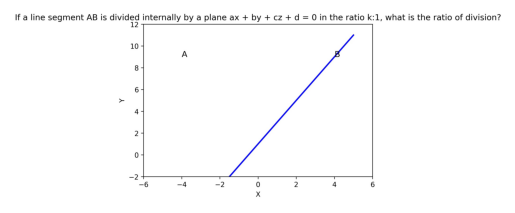

Options: ['A. ((x1 + x2)/2, (y1 + y2)/2, (z1 + z2)/2)', 'B. ((2x1 + x2)/3, (2y1 + y2)/3, (2z1 + z2)/3)', 'C. ((x1 + 2x2)/3, (y1 + 2y2)/3, (z1 + 2z2)/3)', 'D. None of the above']
Answer: A
Explanation: The mid-point of a line segment joining two points A(x1, y1, z1) and B(x2, y2, z2) is given by the point ((x1 + x2)/2, (y1 + y2)/2, (z1 + z2)/2).



In [21]:

# Access the questions and their details
questions = json_data["questions"]
for question in questions:
    print("Question:", question["question"])
    create_image(question["question"])
    print("Options:", question["answer_choices"])
    print("Answer:", question["correct_answer"])
    print("Explanation:", question["explanation"])

    print()